In [ ]:
### Machine Running library install
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression

### 선형, 다중, 다항 회귀모델 라이브러리 정의
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 앙상블 모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor

### visualization library
import matplotlib.pyplot as plt

# Definition of the NumPy library
import numpy as np

### Definition of Library (Preprocessing Library)
from sklearn.model_selection import train_test_split

### 평가 라이브러리 정의
# 평균절대오차(MAE)
from sklearn.metrics import mean_absolute_error
# 평균제곱오차(MSE)
from sklearn.metrics import mean_squared_error
# 결정계수(R2-score)
from sklearn.metrics import r2_score

### 오차행렬 및 오차행렬도 라이브러리 정의하기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# - 변환기 모델(클래스) 라이브러리 정의하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# - 결정트리 모델(클래스) 라이브러리 정의
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pandas as pd 

import seaborn as sns


### 라이브러리 정의
from scipy.stats import spearmanr

### 라이브러리 정의
from scipy.stats import pearsonr

### 하이퍼파라미터 튜닝 모델(클래스) 정의하기
from sklearn.model_selection import GridSearchCV

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

### 경고 메시지 없애기
# - 사이킷런 버전에 따라 오류가 아니니 안내(경고)메시지가 자주 나타남
# - 안내(경고) 메시지 없이 실행할 수 있도록 처리
from sklearn import set_config
set_config(display="text")


In [ ]:
"""
* 사용 데이터: 08_wine.csv
* 분석 주제  : 알콜, 당도, 농도를 이용해서 와인종류 예측하기
 - alcohol: 알콜
 - sugar  : 당도
 - pH     : 농도
 - class  : 와인종류(0은 레드와인, 1은 화이트와인)
* 독립변수: 알콜, 당도, 농도
* 종속변수: 와인종류
"""

### 데이터 불러들이기

In [2]:
### 변수명: wine
file_path = "./data/08_wine.csv"
wine = pd.read_csv(file_path)
print(wine.info())
print(wine.describe())
print(wine.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None
           alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000
   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0


### 상관관계 분석

In [ ]:
"""
### 상관계수 확인하기
 1. 상관관계 매트릭스
 2. 상관관계도(히트맵) 그리기
 3. 상관행렬도(혼동행렬도) 산점도 그리기
"""

In [3]:
### 1. 상관관계 매트릭스 표
correlation_matrix = wine.corr()
correlation_matrix

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


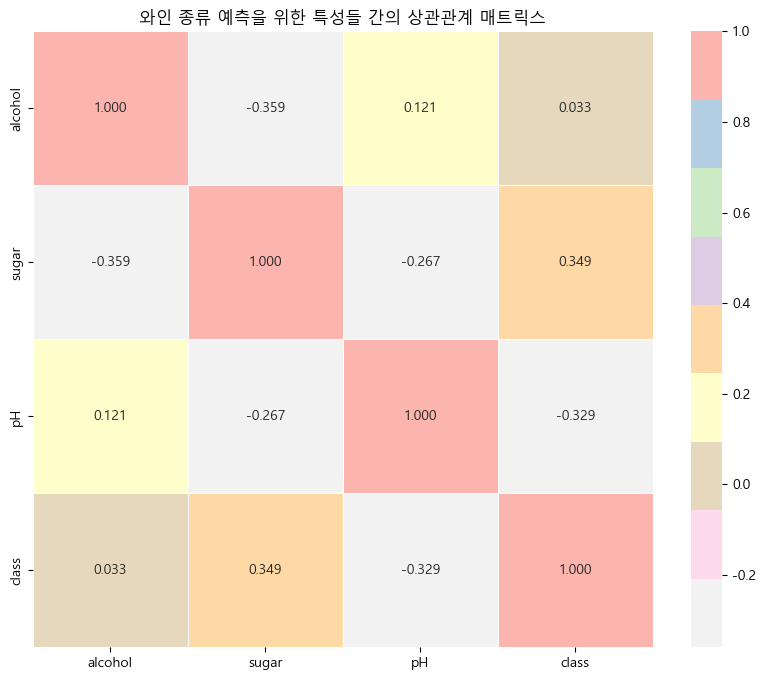

In [4]:
### 2. 상관관계도(히트맵) 그리기
plt.figure(figsize=(10,8))
plt.title("와인 종류 예측을 위한 특성들 간의 상관관계 매트릭스")

sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="Pastel1_r", linewidths=0.5)

plt.show()

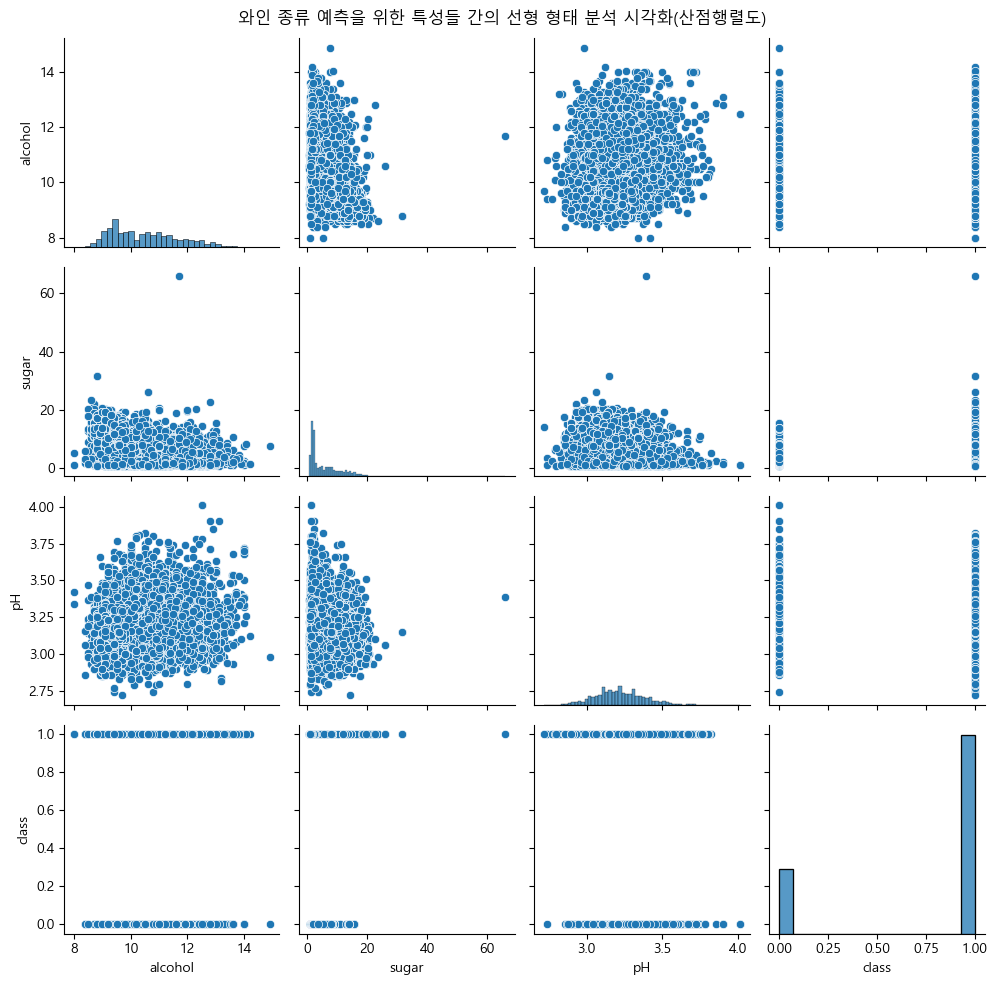

In [5]:
### 3. 상관행렬도(혼동행렬도) 산점도 그리기
sns.pairplot(wine)
plt.suptitle("와인 종류 예측을 위한 특성들 간의 선형 형태 분석 시각화(산점행렬도)")
plt.tight_layout()
plt.show()

### (해석)
# 종속변수를 기준으로 다른 특성들과의 산점도 분포를 확인한 결과
# - 수평적 형태를 나타내고 있음
# - 따라서, 분류분석으로 진행하게 됨

### 독립변수와 종속변수로 분리하기

In [6]:
### 독립변수명: data, 종속변수명: target
# - array타입이 아닌 데이터프레임에서 그냥 분리.
data = wine.iloc[:, :-1]
target = wine["class"]

data.shape, target.shape

((6497, 3), (6497,))

### 상관관계 검증하기 (스피어만, 피어슨 모두 해보기)

In [ ]:
"""
피어슨 및 스피어만 방식으로 상관관계 검증하기
 - 종속변수에 대한 각 특성들관의 "유의미성 확인 후 해석하기"
"""

In [7]:
data_columns_nm = data.columns
data_columns_nm

Index(['alcohol', 'sugar', 'pH'], dtype='object')

In [8]:
### 1. 스피어만 방식
spearmanr(data[data_columns_nm[0]], target)

for col in data_columns_nm:
    stat, p_value = spearmanr(data[col], target)
    print(f"[{col}] vs class : statistic={stat:.4f}, p_value={p_value:.4f}")
    
### (해석)
# - 알콜의 경우 유의미 계수는 0.1819로, p-value < 0.05에 따른 유의미 하지 않으며,
# - 당도 및 농도의 경우에는 모두 p_value < 0.05를 만족하는 유의미한 것으로 나타남

[alcohol] vs class : statistic=0.0166, p_value=0.1819
[sugar] vs class : statistic=0.2565, p_value=0.0000
[pH] vs class : statistic=-0.3365, p_value=0.0000


In [9]:
### 2. 피어스만 방식
pearsonr(data[data_columns_nm[0]], target)

for col in data_columns_nm:
    stat, p_value = pearsonr(data[col], target)
    print(f"[{col}] vs class : statistic={stat:.4f}, p_value={p_value:.4f}")
    
### (해석)
# - 알콜, 당도, 농도의 유의미 계수는 -> 모두 p_value < 0.05를 만족하는 유의미한 것으로 나타남

[alcohol] vs class : statistic=0.0330, p_value=0.0079
[sugar] vs class : statistic=0.3488, p_value=0.0000
[pH] vs class : statistic=-0.3291, p_value=0.0000


### 훈련 : 테스트 = 8 : 2로 분리하기

In [10]:
### 변수명: **_input, **_target
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


### Standard 스케일링 처리

In [11]:
### 독립변수명: **_scaled
scaler = StandardScaler()

scaler.fit(train_input)

train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

print(train_scaled.shape, train_target.shape)
print(test_scaled.shape, test_target.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


### KNN 모델로 과적합 여부 확인

In [12]:
### 튜닝 없이 기본값으로만 수행
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

train_score = kn.score(train_scaled, train_target)
test_score  = kn.score(test_scaled, test_target)

print(f"훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")

훈련정확도: 0.9041754858572253, 테스트정확도: 0.8407692307692308, 과적합여부: 0.06340625508799447


### LogisticRegression 모델로 과적합 여부 확인

In [13]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

train_score = lr.score(train_scaled, train_target)
test_score  = lr.score(test_scaled, test_target)

print(f"훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")

훈련정확도: 0.7827592842024245, 테스트정확도: 0.7761538461538462, 과적합여부: 0.0066054380485782715



### 결정트리(Decision Tree, DT) 모델

In [ ]:
"""
<결정트리 모델>
 - 결정트리, 의사결정나무, DT 모델이라고 칭합니다.(모두 같은 의미)
 - 트리(나무) 구조처럼 가지를 치면서 뻗어나가는 방식으로 훈련을 한다고 해서 Tree라고 칭함
 - 스스로 가지를 뻗어나가면서 훈련, 랜덤하게 진행됨
 - 모델 생성 시 랜덤 규칙 적용하면 좋음
 - 분류 정확도가 높은 모델로, 분류 분석시에 처음 진행하는 모델로 사용되었으나,
   앙상블 모델이 나오면서, 비교 대상 모델로만 주로 사용되고 있음
 - DT 모델의 경우 트리 구조의 시각화를 지원하고 있음(앙상블은 해당 사항 없음)
 
<사용 라이브러리>
 - 패키지: sklearn.tree
 - 사용모델(클래스): DecisionTreeClassifier
 - 사용되는 함수: 기존과 동일(fit, score, predict)
 - 트리 시각화: plot_tree()함수 사용
"""

In [14]:
### DT 모델을 이용하여 훈련 및 과적합여부 확인하기
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)

print(f"훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")

###(해석)
# - KNN 및 LR 모델보다는 높은 훈련정확도를 나타내고 있으나,
# - 과대적합이 다소 나타나는 것으로 보임
# - 향후, 과대적합을 해소하기 위한 튜닝을 진행하여 일반화를 해 볼 필요성 있음

훈련정확도: 0.9978833942659227, 테스트정확도: 0.8661538461538462, 과적합여부: 0.1317295481120765


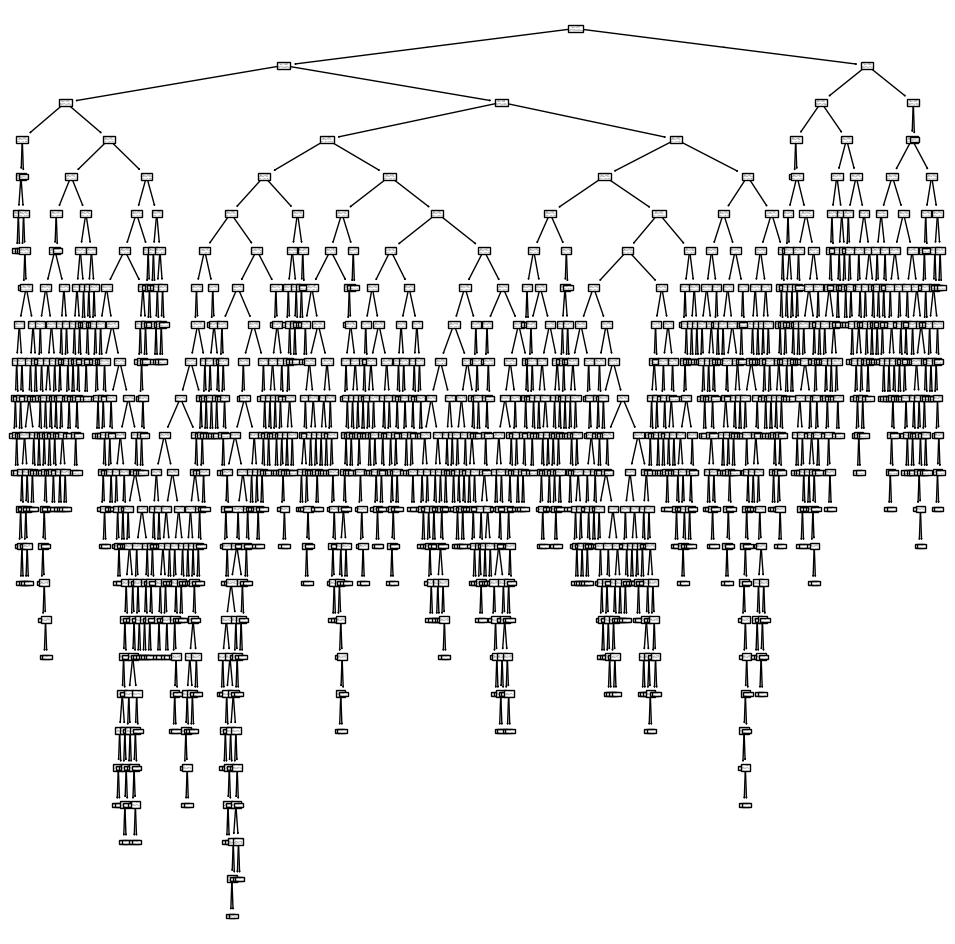

In [15]:
### 결정트리 시각화하기
plt.figure(figsize=(12,12))
plot_tree(dt)
plt.show()

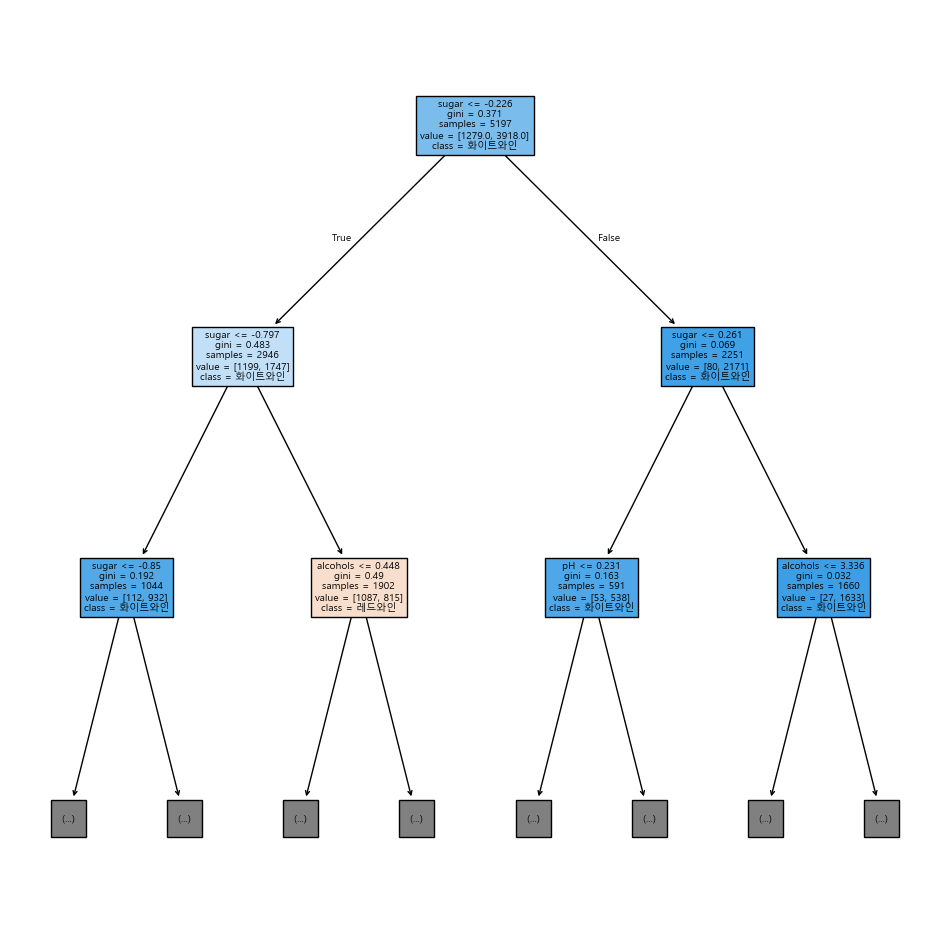

'\n<트리 구조 정의>\n - 네모 박스  : "노드(node)"라고 칭함\n - 첫번째 노드: 루트(root) 노드(node)라고 칭함\n - 마지막 노드: 리프(leaf) 노드(node)라고 칭함\n - 루트(root) 노드(node)의 시작은 -> 모델에 의해 랜덤하게 결정되어 시작됨\n                                  -> 보통 상관관계가 높은 특성이 주로 선택되어 시작됨\n - samples: 해당 노드에서 사용된 특성에 해당하는 독립변수의 데이터 갯수를 의미함\n - gini   : "불순도"라고 칭합니다. 즉, 정확도를 의미한다고 생각하면 됨\n          : 불순도의 범위 -> 0~0.5 사이의 값으로 결정됨\n          : 0에 가까울수록 정확도가 좋은 것, 0.5에 가까울수록 정확도가 안좋은 것\n          : 트리(tree)의 최종 목적은 gini 불순도의 값을 최대한 가깝도록 뻗어나가면서 줄이는 것임\n          : 마지막 노드에 의해 종속변수가 예측됨\n - value  : sample의 총 데이터 갯수 중에 ->종속변수 범주 각각에 대한 데이터의 갯수\n - class  : value의 종속변수 갯수 중에 많은 쪽의 종속변수 범주의 이름을 표시함\n - 트리가 뻗어 나갈 때 -> 노드의 조건이 True이면 왼쪽편, False이면 오른쪽으로 뻗어나감\n'

In [16]:
### 트리의 깊이를 조정하여 결정트리 시각화하기
plt.figure(figsize=(12,12))

### max_depth    : 트리 깊이 정의(첫번째와 마지막 제외한 깊이를 의미함)
### filled       : 특성별로 박스의 색상을 구분함
### feature_names: 특성의 이름을 정희아혀 그래프에 표현되도록
### class_name   : 종속변수 범주의 이름을 정희하여 그래프에 표현되도록
plot_tree(dt, max_depth=2, filled=True, feature_names=["alcohols", "sugar", "pH"], class_names=["레드와인", "화이트와인"])

plt.show()

"""
<트리 구조 정의>
 - 네모 박스  : "노드(node)"라고 칭함
 - 첫번째 노드: 루트(root) 노드(node)라고 칭함
 - 마지막 노드: 리프(leaf) 노드(node)라고 칭함
 - 루트(root) 노드(node)의 시작은 -> 모델에 의해 랜덤하게 결정되어 시작됨
                                  -> 보통 상관관계가 높은 특성이 주로 선택되어 시작됨
 - samples: 해당 노드에서 사용된 특성에 해당하는 독립변수의 데이터 갯수를 의미함
 - gini   : "불순도"라고 칭합니다. 즉, 정확도를 의미한다고 생각하면 됨
          : 불순도의 범위 -> 0~0.5 사이의 값으로 결정됨
          : 0에 가까울수록 정확도가 좋은 것, 0.5에 가까울수록 정확도가 안좋은 것
          : 트리(tree)의 최종 목적은 gini 불순도의 값을 최대한 가깝도록 뻗어나가면서 줄이는 것임
          : 마지막 노드에 의해 종속변수가 예측됨
 - value  : sample의 총 데이터 갯수 중에 ->종속변수 범주 각각에 대한 데이터의 갯수
 - class  : value의 종속변수 갯수 중에 많은 쪽의 종속변수 범주의 이름을 표시함
 - 트리가 뻗어 나갈 때 -> 노드의 조건이 True이면 왼쪽편, False이면 오른쪽으로 뻗어나감
"""

### 결정트리 하이퍼파라미터 튜닝하기

In [17]:
### 트리 가지치기 튜닝
# - 가지치기: 트리가 너무 많이 뻗어 나가는 것을 제한하는 방법
# - 제한하는 하이퍼파라미터: max_depth
# - max_depth의 갯수를 제한하였어도, 사전에 종속변수가 결정이 되면, 훈련을 종료함
#   (종속변수가 졀정되는 시점 -> 더 이상 뻗어 나가지 못할 경우를 의미함)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(train_scaled, train_target)

train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)

print(f"훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")


훈련정확도: 0.8718491437367712, 테스트정확도: 0.8576923076923076, 과적합여부: 0.014156836044463605


In [18]:
### max_depth의 값의 범위 3~10까지 중에 좋은 갯수 찾아주세요...
for depth in range(3, 101, 1):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(train_scaled, train_target)

    train_score = dt.score(train_scaled, train_target)
    test_score = dt.score(test_scaled, test_target)

    print(f"[{depth}번째] 훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")
    
### 가장 최적의 max_depth는 12개가 가장 적합함
# - 훈련정확도: 0.941312295555128, 테스트정확도: 0.8576923076923076, 과적합여부: 0.08361998786282032


[3번째] 훈련정확도: 0.8458726188185491, 테스트정확도: 0.8407692307692308, 과적합여부: 0.005103388049318314
[4번째] 훈련정확도: 0.8595343467385029, 테스트정확도: 0.8523076923076923, 과적합여부: 0.007226654430810608
[5번째] 훈련정확도: 0.8718491437367712, 테스트정확도: 0.8576923076923076, 과적합여부: 0.014156836044463605
[6번째] 훈련정확도: 0.8778141235328074, 테스트정확도: 0.8484615384615385, 과적합여부: 0.029352585071268922
[7번째] 훈련정확도: 0.8880123147969983, 테스트정확도: 0.8515384615384616, 과적합여부: 0.03647385325853669
[8번째] 훈련정확도: 0.9003271117952665, 테스트정확도: 0.8584615384615385, 과적합여부: 0.04186557333372798
[9번째] 훈련정확도: 0.9124494900904367, 테스트정확도: 0.8615384615384616, 과적합여부: 0.05091102855197516
[10번째] 훈련정확도: 0.9255339619010968, 테스트정확도: 0.8615384615384616, 과적합여부: 0.06399550036263524
[11번째] 훈련정확도: 0.941312295555128, 테스트정확도: 0.8576923076923076, 과적합여부: 0.08361998786282032
[12번째] 훈련정확도: 0.9538195112564941, 테스트정확도: 0.8653846153846154, 과적합여부: 0.0884348958718787
[13번째] 훈련정확도: 0.9680584952857417, 테스트정확도: 0.8623076923076923, 과적합여부: 0.1057508029780494
[14번째] 훈련정확도: 0.97575524340

### 특성 중요도(Feature Importances) 확인하기

In [ ]:
"""
<특성 중요도>
 - 훈련에 사용된 독립변수 각각의 특성들이
   훈련에 어느정도 영향을 미치는지를 확인하는 방법
 - 사용 속성: feature_importances_
 - 상된 특성: 알콜, 당도, 농도
"""

In [19]:
dt.classes_
### 0은 레드와인, 1은 화이트와인

array([0., 1.])

In [20]:
dt.feature_importances_
### 특성: 알콜, 당도, 농도

array([0.23393909, 0.51450301, 0.2515579 ])

### 상관계수가 가장 낮았던 알콜 특성을 제외하고 진행해보기

In [21]:
### 독립변수에서 알콜을 제외하고 과적합 여부 확인해 주세요.
# - 기존 훈련정확도와 비교해보기

# 'alcohol' 컬럼의 인덱스 확인 (가령, 'alcohol'이 첫 번째 컬럼이라면 index 0)
alcohol_index = 0  # 만약 'alcohol'이 첫 번째 컬럼이라면, 인덱스 0을 사용합니다.
# 또는, 'alcohol'이 몇 번째 컬럼인지 정확히 알고 있으면 그 인덱스를 사용합니다.

# 'alcohol' 컬럼을 제외한 데이터 준비
train_scaled_sp = np.delete(train_scaled, alcohol_index, axis=1)
test_scaled_sp = np.delete(test_scaled, alcohol_index, axis=1)

# 독립변수에서 'alcohol'만 제외한 데이터로 모델 훈련
dt = DecisionTreeClassifier(max_depth=12, random_state=42)
dt.fit(train_scaled_sp, train_target)

# 훈련 및 테스트 정확도 평가
train_score = dt.score(train_scaled_sp, train_target)
test_score = dt.score(test_scaled_sp, test_target)

# 결과 출력
print(f"훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")

### - 특성 3개 알콜, 당도, 농도 훈련정확도: 0.9538195112564941, 테스트정확도: 0.8653846153846154, 과적합여부: 0.0884348958718787
### - 특성 2개       당도, 농도 훈련정확도: 0.9032133923417356, 테스트정확도: 0.8407692307692308, 과적합여부: 0.062444161572504764


훈련정확도: 0.9032133923417356, 테스트정확도: 0.8407692307692308, 과적합여부: 0.062444161572504764


In [22]:
### 특성 3개 모두 사용했을 때, max_depth = 12
dt = DecisionTreeClassifier(max_depth=12, random_state=42)
dt.fit(train_scaled, train_target)

train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)

print(f"훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")

훈련정확도: 0.9538195112564941, 테스트정확도: 0.8653846153846154, 과적합여부: 0.0884348958718787


### 훈련모델 평가를 위해 -> 예측하기

In [23]:
test_pred = dt.predict(test_scaled)
test_pred

array([0., 1., 1., ..., 0., 0., 1.])

### 훈련모델 평가하기(분류분석 평가)

In [ ]:
"""
<분류모델 평가방법>
 - 예측 결과를 이용하여 평가 진행
 - 정확도, 정밀도, 재현율, F1-score 지표를 이용하여 평가함
 - 평가 기준은 부정확한 오류가 있는지 확인하는 절차를 통해 진행
 - 부정확한 오류     : 예측이 잘못된 경우를 의미함
 - 오류의 종류       : 긍정적 오류와 부정적 오류로 분류됨
 - 오류 확인하는 방법: 오차행렬(혼동행렬), 옹차행령도,(혼동행렬도)를 통해 오류 종류 확인

<평가기준>
 - 정확도(score와 동일)를 이용하여 과적합 여부 확인(훈련 fit 이후 score로 확인 진행)
 - 평가기준: 일반화 및 훈련정확도가 높다는 가정하에 진행
  -> 재현율이 높고, f1-score 값이 높은 모델 선정
  -> 재현율이 낮은 경우에는 부정확한 오류(부정적 오류)가 많다는 의미임
 - 정확도, 정밀도, 재현율, f1-score의 지표(값)의 범위: 0~1 사이의 값(확율의 의미)
                                                     : 1에 가까울 수록 좋음

<주의사항>
 - 정확도가 높더라도, 재현율이 낮은 경우에는 훈련모델 선정에서 제외되는 경우가 있음
 
<최종모델 선정기준>
 - 일반화 > 정확도 & 정밀도 > f1-score > 정밀도
 
<사용 라이브러리>
 - 오차행령(혼동행렬) 매트릭스  : confusion_matrix
 - 오차행렬도(혼동행렬도) 시각화: ConfusionMatrixDisplay
 - 위 두개 패키지               : sklearn.metrics
 - 시각화 및 넘파이 라이브러리가 정의되어 있으면 좋음
"""

In [ ]:
### 오차행렬 및 오차행렬도 라이브러리 정의하기

In [25]:
### 오차행렬(혼동행렬) 매트릭스 확인하기
# - labels: 종속변수 범주의 값(리스트 타입, 이진분류이기에 0과 1이 해당됨)
cm = confusion_matrix(test_target, test_pred, labels=dt.classes_)
cm

array([[240,  80],
       [ 95, 885]], dtype=int64)

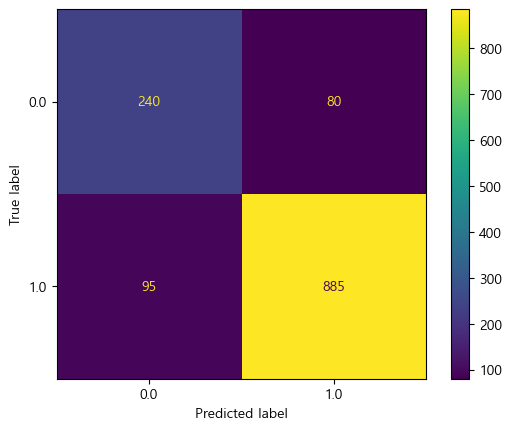

In [ ]:
### 오차행렬도(혼동행렬도) 시각화하기
# - confusion_matrix: 오차행령(혼동행령) 매트릭스 결과
# - display_labels  : 종속변수의 범주 값(0, 1의 리스트 타입)
dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
dist.plot()
plt.show()

In [ ]:
"""
<오차행렬(혼동행렬)>
 - 어떠한 유형의 오류가 발생하고 있는지를 나타내는 값
 - 이를 시각화한 것을 오차행렬도(혼동행렬도)라고 칭합니다.
 - 정확도(score)의 값과 오차행렬도의 시각화 결과로 모델을 최종 선정하게 됩니다.
 
<해석 방법>
 - 긍정(Positive)적 오류인지, 부정(Negative)적 오류인지로 해석됩니다.
   (긍정은 1, 부정은 0 입니다.)
   
 - 오류의 종류 : 긍정적(Positive) 오류, 부정적(Negative) 오류로 구분합니다.
 
<오류 해석>
 * 긍정적(Positive) 오류
  - *** 0(부정)을 1(긍정)로 예측한 경우 ***
  - 예측 결과가 맞지는 않음(False)
  - 위험하지 않은 오류라고도 표현합니다.
  - 이론에서는 "FP(False Positive)"라고 칭합니다.
  
 * 부정적(Negative) 오류
  - *** 1(긍정)을 0(부정)으로 예측한 경우 ***
  - 예측 결과가 맞지는 않음(False)
  - 위험한 오류라고도 표현 합니다.
  - 이론에서는 "FN(False Negative)"라고 칭합니다.
  - 정확도가 높더라도, FN의 값이 큰 경우에는 재현율 값이 낮아지기에,
    예측 모델로 사용하는데 신중해야 합니다.(보통 제외)
    
<예측이 잘된 경우>
 * TP(True Positive)
   - 1(긍정)을 1(긍정)로 잘(True) 예측한 경우
   
 * TN(True Negative)
   - 0(부정)을 0(부정)으로 잘(True) 예측한 경우
"""

In [ ]:
"""
<평가에 사용되는 값>
 - 정확도, 정밀도, 재현율, f1-score
 
 * 정확도(Accuracy)
  - 분류 모델에서 score의 값과 동일함
  - 사용패키지 : sklearn.metrics
  - 사용라이브러리 : accuracy_score
  - 예측결과가 실제값을 얼마나 정확하게 예측했는지를 나타낸 값
  - Accuracy = (TP + TN) / (TP + TN + FP + FN)
  
 * 정밀도(Precision)
  - 1(긍정)로 예측한 데이터 중에 실제 1(긍정)로 잘 예측한 값
  - Precision = TP / (TP + FP)
  - 긍정적오류(FP)가 높을 수록 정밀도는 낮아집니다.
  - 사용패키지 : sklearn.metrics
  - 사용라이브러리 : precision_score
  
 * 재현율(Recall)
  - 실제 1(긍정)을 1(긍정)로 잘 예측한 값
  - Recall = TP / (TP + FN)
  - 부정적오류(FN)가 높을 수록 재현율은 낮아집니다.
  - 사용패키지 : sklearn.metrics
  - 사용라이브러리 : recall_score
  
 * f1-score
  - 정밀도와 재현율을 조합하여 하나의 통계치로  반환한 값
  - f1-score = (정밀도 * 재현율) / (정밀도 + 재현율)
  - 사용패키지 : sklearn.metrics
  - 사용라이브러리 : f1_score
  
<최종 모델 선정 방법>
 - 과소 및 과대 적합이 일어나지 않아야 함
 - 재현율과 f1-score가 모두 높으면 우수한 모델로 평가할 수 있음
 - 재현율이 현저히 낮은 경우에는 모델 선정 시 고민 필요
 - 일반화되고, 정확도 높고, 재현율 높고, f1-score가 높은 모델을 선정
   (여러가지 종합적으로 고려하여 판단해야 함)
"""